# Correlations

We compute the correlation matrices for the varuois dataset that we. Then for the different methods, we compute the difference of the correlations according to the initial dataset $R$.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
PATIENTS = [50, 100, 200, 500, 1000, 1977]
METHODS = ['Baynet', 'CTGAN', 'MIIC', 'PRIVBayes', 'Synthpop']

n_patients = len(PATIENTS)
n_methods = len(METHODS)

If $R$ denotes the initial dataset, and $S$ the synthetised one, we compute the correlation matrices $\rho_R$ and $\rho_S$ and the difference $\rho_S - \rho_R$.
For each method, we compare the different dataset that are given, for various size of population.

## Compute everything

In [39]:
R_ref = {}

for p in PATIENTS:
    df_ref = pd.read_csv(f'data/MIXED{p}patients_subsamples/1/brca_mRNA_{p}patients.csv')
    R_ref[p] = df_ref.corr()


# Baynet
R_synth_Baynet = {}
SEEDS_BAYNET = list(range(1, 13))
for p in PATIENTS:
    for seed in SEEDS_BAYNET:
            df = pd.read_csv(f'data/MIXED{p}patients_subsamples/1/Baynet/brca_mRNA_patients_BayNet_n20_deg2_eps0_seed_{seed}.csv')
            R_synth_Baynet[p, seed] = df.corr()

# CTGAN
R_synth_CTGAN = {}
for p in PATIENTS:
    df = pd.read_csv(f'data/MIXED{p}patients_subsamples/1/CTGAN/brca_mRNA_patients_embedding_dim128_gen_dim256_dis_dim256_l2scale1e-06_batch_size500_epochs500.csv')
    R_synth_CTGAN[p] = df.corr()

# MIIC
R_synth_MIIC = {}
INDEX_MIIC = list(range(1, 12))
for p in PATIENTS:
    for index in INDEX_MIIC:
        df = pd.read_csv(f'data/MIXED{p}patients_subsamples/1/MIIC/syntheticData_mixedNetwork_test_fast_root_index_{index}.csv')
        R_synth_MIIC[p, index] = df.corr()

# PrivBayes
R_synth_PRIVBayes = {}
PRIV_BAYES_SEEDS = list(range(1, 13))
for p in PATIENTS:
    for seed in range(1, 13):
        if not (p == 100 and seed == 11):
            df = pd.read_csv(f'data/MIXED{p}patients_subsamples/1/PrivBayes/brca_mRNA_patients_PrivBayes_n20_deg2_eps1_seed_{seed}.csv')
            R_synth_PRIVBayes[p, seed] = df.corr()

# Synthpop
R_synth_Synthpop = {}
SYNTHPOP_ITERATIONS = list(range(1, 13))
for p in PATIENTS:
    for iteration in range(1, 13):
        df = pd.read_csv(f'data/MIXED{p}patients_subsamples/1/Synthpop/brca_mRNA_{p}patients_iteration_{iteration}_.csv')
        R_synth_Synthpop[p, iteration] = df.corr()

In [56]:
df_ref

,CANCER_TYPE_DETAILED,ER_STATUS,HER2_STATUS,GRADE,PR_STATUS,TUMOR_SIZE,TUMOR_STAGE,TMB_NONSYNONYMOUS,LYMPH_NODES_EXAMINED_POSITIVE,NPI,...,OS_MONTHS,CLAUDIN_SUBTYPE,THREEGENE,VITAL_STATUS,LATERALITY,RADIO_THERAPY,HISTOLOGICAL_SUBTYPE,BREAST_SURGERY,RFS_STATUS,RFS_MONTHS
0,Breast Invasive Ductal Carcinoma,Positive,Negative,2.0,Positive,20.0,1.0,7.845106,0.0,3.040,...,106.566667,Her2,ER+/HER2- High Prolif,Died of Disease,Right,YES,Ductal/NST,MASTECTOMY,1:Recurred,26.45
1,Breast Mixed Ductal and Lobular Carcinoma,Positive,Negative,2.0,Positive,17.0,1.0,10.460142,0.0,3.034,...,257.633333,LumA,ER+/HER2- Low Prolif,Living,Left,NO,Mixed,MASTECTOMY,0:Not Recurred,254.24
2,Breast Invasive Ductal Carcinoma,Positive,Positive,3.0,Negative,35.0,NaN,5.230071,14.0,6.070,...,15.866667,Basal,HER2+,Died of Disease,Left,YES,Ductal/NST,MASTECTOMY,1:Recurred,12.53
3,Breast Invasive Ductal Carcinoma,Negative,Negative,3.0,Negative,20.0,1.0,13.075177,0.0,4.040,...,151.066667,Basal,ER-/HER2-,Living,Right,YES,Ductal/NST,BREAST CONSERVING,0:Not Recurred,149.08
4,Breast Invasive Lobular Carcinoma,Positive,Negative,2.0,Positive,25.0,NaN,3.922553,0.0,3.050,...,80.433333,LumA,ER+/HER2- Low Prolif,Died of Other Causes,NaN,NO,Lobular,MASTECTOMY,0:Not Recurred,79.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972,Breast Mixed Ductal and Lobular Carcinoma,Positive,Negative,3.0,Positive,35.0,NaN,13.075177,0.0,4.070,...,103.100000,LumA,ER+/HER2- Low Prolif,Died of Disease,Left,NO,Mixed,MASTECTOMY,1:Recurred,101.74
1973,Breast Invasive Ductal Carcinoma,Positive,Negative,2.0,Positive,18.0,2.0,7.845106,7.0,5.036,...,71.766667,LumB,ER+/HER2- High Prolif,Died of Disease,Right,YES,Ductal/NST,BREAST CONSERVING,1:Recurred,66.81
1974,Breast Invasive Ductal Carcinoma,Positive,Negative,1.0,Positive,70.0,3.0,5.230071,5.0,4.140,...,85.333333,LumA,ER+/HER2- Low Prolif,Living,Left,YES,Ductal/NST,MASTECTOMY,0:Not Recurred,84.21
1975,Breast Invasive Ductal Carcinoma,Positive,Negative,2.0,Positive,20.0,1.0,7.845106,0.0,3.040,...,237.500000,LumB,ER+/HER2- High Prolif,Living,Right,YES,Ductal/NST,BREAST CONSERVING,1:Recurred,26.81


Example of corelation matrix:

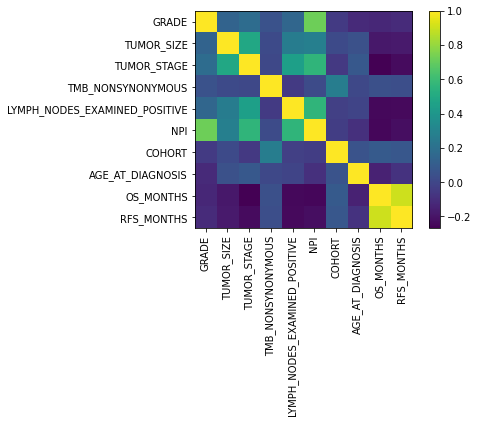

In [52]:
R_ref[1977].keys()

plt.imshow(R_ref[1977])
plt.colorbar()
plt.xticks(range(len(R_ref[1977].keys())), R_ref[1977].keys(), rotation=90)
plt.yticks(range(len(R_ref[1977].keys())), R_ref[1977].keys())
plt.show()

## Display results

### Baynet

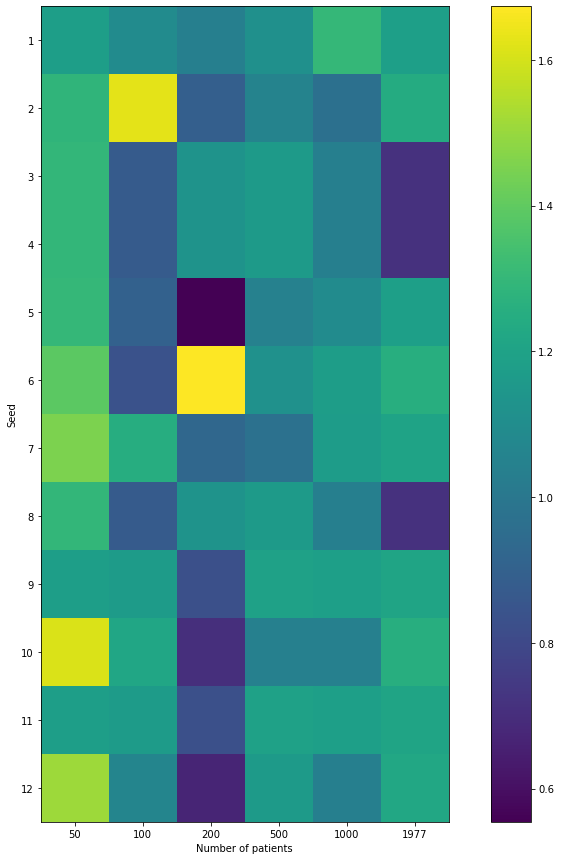

In [18]:
NORM = np.zeros((len(SEEDS_BAYNET), n_patients))

for i, seed in enumerate(SEEDS_BAYNET):
    for k, p in enumerate(PATIENTS):
        NORM[i, k] = np.linalg.norm(R_ref[p] - R_synth_Baynet[p, seed])

plt.figure(figsize=(15, 15))
plt.imshow(NORM)
plt.colorbar()
plt.xlabel("Number of patients")
plt.xticks(range(6), PATIENTS)
plt.ylabel("Seed")
plt.yticks(range(12), SEEDS_BAYNET)
plt.show()

### CTGAN

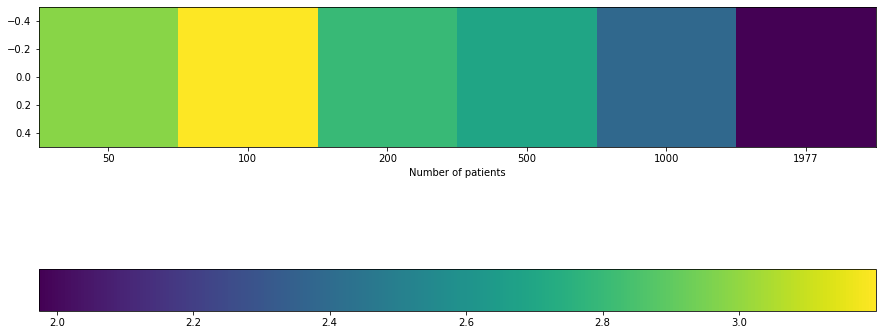

In [33]:
NORM = np.zeros((1, n_patients))

for k, p in enumerate(PATIENTS):
    NORM[0, k] = np.linalg.norm(R_ref[p] - R_synth_CTGAN[p])

plt.figure(figsize=(15, 15))
plt.imshow(NORM)
plt.colorbar(location='bottom')
plt.xlabel("Number of patients")
plt.xticks(range(6), PATIENTS)
plt.show()

### MICC

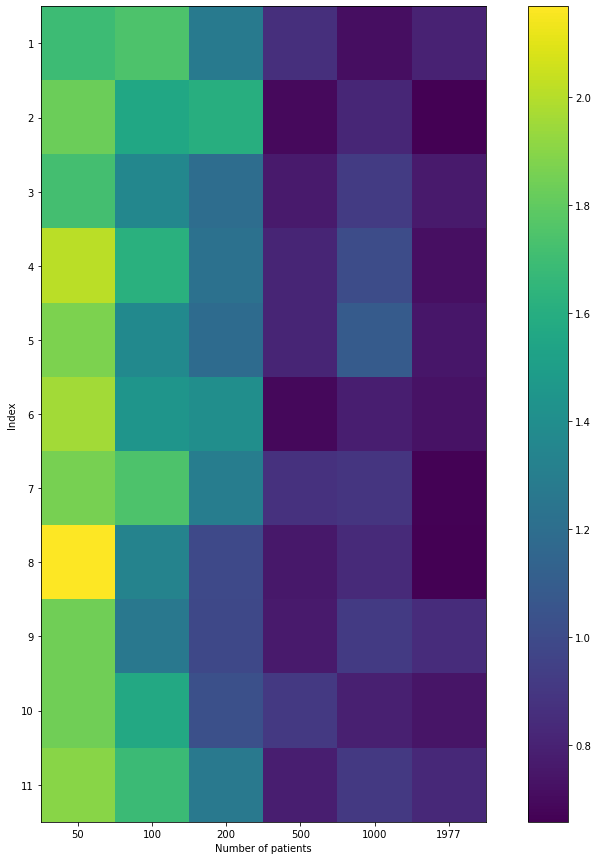

In [29]:
NORM = np.zeros((len(INDEX_MIIC), n_patients))

for i, index in enumerate(INDEX_MIIC):
    for k, p in enumerate(PATIENTS):
        NORM[i, k] = np.linalg.norm(R_ref[p] - R_synth_MIIC[p, index])

plt.figure(figsize=(15, 15))
plt.imshow(NORM)
plt.colorbar()
plt.xlabel("Number of patients")
plt.xticks(range(6), PATIENTS)
plt.ylabel("Index")
plt.yticks(range(len(INDEX_MIIC)), INDEX_MIIC)
plt.show()

### PrivBayes

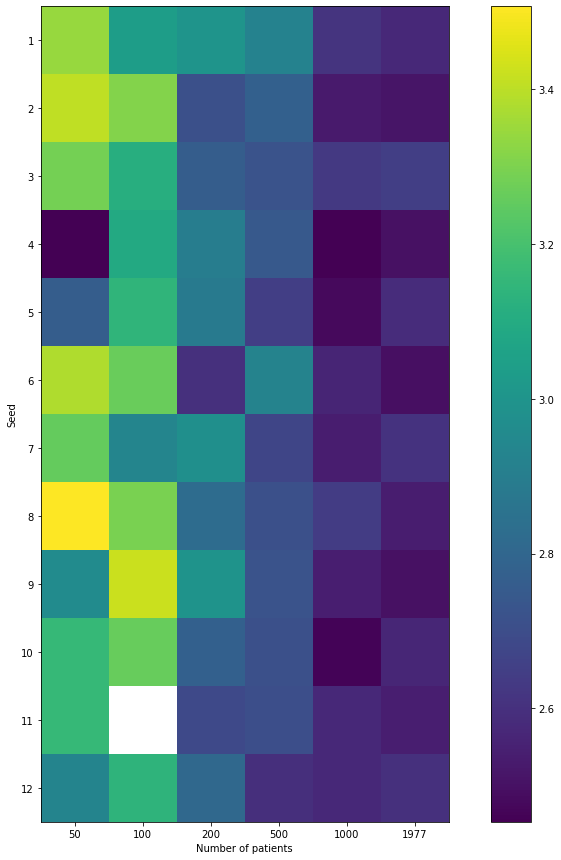

In [35]:
NORM = np.zeros((len(PRIV_BAYES_SEEDS), n_patients))

for i, seed in enumerate(PRIV_BAYES_SEEDS):
    for k, p in enumerate(PATIENTS):
        if not (p == 100 and seed == 11):
            NORM[i, k] = np.linalg.norm(R_ref[p] - R_synth_PRIVBayes[p, seed])
        else:
            NORM[i, k] = np.nan

plt.figure(figsize=(15, 15))
plt.imshow(NORM)
plt.colorbar()
plt.xlabel("Number of patients")
plt.xticks(range(6), PATIENTS)
plt.ylabel("Seed")
plt.yticks(range(12), SEEDS_BAYNET)
plt.show()

### Synthpop

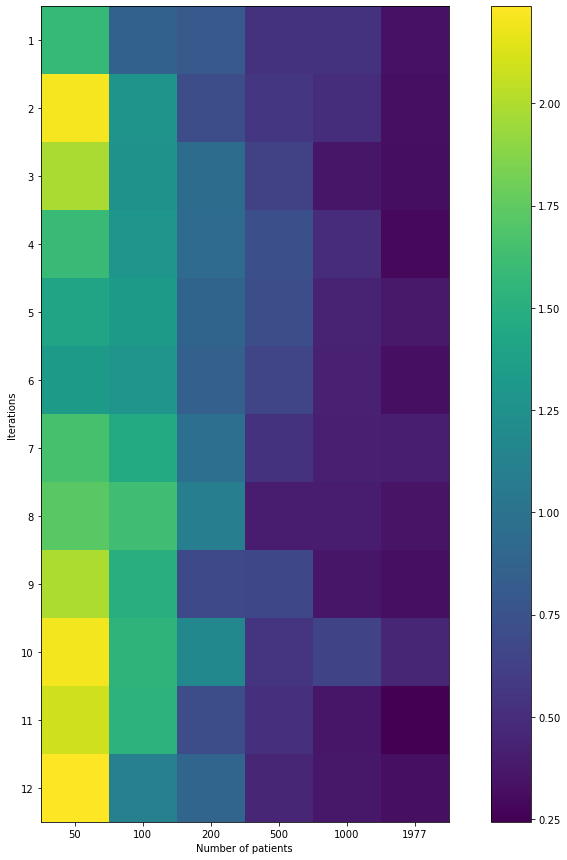

In [37]:
NORM = np.zeros((len(SYNTHPOP_ITERATIONS), n_patients))

for i, index in enumerate(SYNTHPOP_ITERATIONS):
    for k, p in enumerate(PATIENTS):
        NORM[i, k] = np.linalg.norm(R_ref[p] - R_synth_Synthpop[p, index])

plt.figure(figsize=(15, 15))
plt.imshow(NORM)
plt.colorbar()
plt.xlabel("Number of patients")
plt.xticks(range(6), PATIENTS)
plt.ylabel("Iterations")
plt.yticks(range(len(SYNTHPOP_ITERATIONS)), SYNTHPOP_ITERATIONS)
plt.show()